## Importing necessary packages

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
!pip install split-folders
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pathlib
import splitfolders
import shutil
import warnings
import numpy as np
warnings.filterwarnings('ignore')

### MRI with tumor

### Installing packages

In [ ]:
no_path = "/content/drive/MyDrive/brain_tumor_dataset/no"
yes_path = "/content/drive/MyDrive/brain_tumor_dataset/yes"

print(len(os.listdir(no_path)))
print(len(os.listdir(yes_path)))

250
250


## Data augmentation

### For no class

In [ ]:
# We are creating temporary directories here because we delete these directories later
aug_dir = 'aug_dir'
os.mkdir(aug_dir)

# create a dir within the base dir to store images of the same class
img_dir = os.path.join(aug_dir, 'img_dir')
os.mkdir(img_dir)

# We are only data augmenting the "NO" class
img_class = 'no'

# list all images in that directory
img_list = os.listdir('/content/drive/MyDrive/brain_tumor_dataset/' + img_class)


for fname in img_list:
    # source path to image
    src = os.path.join('/content/drive/MyDrive/brain_tumor_dataset/' + img_class, fname)
    # destination path to image
    dst = os.path.join(img_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# point to a dir containing the images and not to the images themselves
path = aug_dir
save_path = "/content/drive/MyDrive/brain_tumor_dataset/" + img_class

# Create a data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

batch_size = 1

aug_datagen = datagen.flow_from_directory(path,
                                          save_to_dir=save_path,
                                          save_format='jpg',
                                          target_size=(224,224),
                                          batch_size=batch_size)


# Generate the augmented images and add them to the training folders

# total number of images we want to have in each class
num_aug_images_wanted = 250
# (Note: We may or may not get the intended num of augmented images, so play will the number. I put 250 here to get 150 images)


num_files = len(os.listdir(img_dir))
num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

# run the generator and create our augmented images
for i in range(0,num_batches):
    imgs, labels = next(aug_datagen)

# delete temporary directory with the raw image files
shutil.rmtree('aug_dir')



Found 250 images belonging to 1 classes.


### For Yes Class

In [ ]:
# We are creating temporary directories here because we delete these directories later
aug_dir = 'aug_dir'
os.mkdir(aug_dir)

# create a dir within the base dir to store images of the same class
img_dir = os.path.join(aug_dir, 'img_dir')
os.mkdir(img_dir)

# We are only data augmenting the "NO" class
img_class = 'yes'

# list all images in that directory
img_list = os.listdir('/content/drive/MyDrive/brain_tumor_dataset/' + img_class)


for fname in img_list:
    # source path to image
    src = os.path.join('/content/drive/MyDrive/brain_tumor_dataset/' + img_class, fname)
    # destination path to image
    dst = os.path.join(img_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# point to a dir containing the images and not to the images themselves
path = aug_dir
save_path = "/content/drive/MyDrive/brain_tumor_dataset/" + img_class

# Create a data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

batch_size = 1

aug_datagen = datagen.flow_from_directory(path,
                                          save_to_dir=save_path,
                                          save_format='jpg',
                                          target_size=(224,224),
                                          batch_size=batch_size)


# Generate the augmented images and add them to the training folders

# total number of images we want to have in each class
num_aug_images_wanted = 250



num_files = len(os.listdir(img_dir))
num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

# run the generator and create our augmented images
for i in range(0,num_batches):
    imgs, labels = next(aug_datagen)

# delete temporary directory with the raw image files
shutil.rmtree('aug_dir')



Found 250 images belonging to 1 classes.


### More balanced Classes now

In [ ]:
print(len(os.listdir(no_path)))
print(len(os.listdir(yes_path)))

250
250


In [ ]:
splitfolders.ratio("/content/drive/MyDrive/brain_tumor_dataset/", output='Images', seed=50, ratio=(0.7, 0.15, 0.15))

Copying files: 500 files [00:01, 250.73 files/s]


In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

train_generator = data_generator.flow_from_directory(
    directory = '/content/Images/train',
    class_mode = 'binary',
    seed = 42,
    target_size = (224, 224),
)
valid_generator = data_generator.flow_from_directory(
    directory = '/content/Images/val',
    class_mode = 'binary',
    seed = 42,
    target_size = (224, 224),
)
test_generator = data_generator.flow_from_directory(
    directory = '/content/Images/test',
    class_mode = 'binary',
    seed = 42,
    target_size = (224, 224),
)

Found 350 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


## Base Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Create a Sequential model
baseline_model = Sequential()

# Convolutional Layer 1
baseline_model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding='same'))
baseline_model.add(BatchNormalization())
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))
baseline_model.add(Dropout(0.25))

# Convolutional Layer 2
baseline_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
baseline_model.add(BatchNormalization())
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))
baseline_model.add(Dropout(0.25))

# Convolutional Layer 3
baseline_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
baseline_model.add(BatchNormalization())
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))
baseline_model.add(Dropout(0.25))

# Flatten the output before the dense layers
baseline_model.add(Flatten())

# Dense Layers
baseline_model.add(Dense(256, activation='relu'))
baseline_model.add(BatchNormalization())
baseline_model.add(Dropout(0.5))


baseline_model.add(Dense(32, activation='relu'))
baseline_model.add(BatchNormalization())
baseline_model.add(Dropout(0.5))

# Output layer with softmax activation for binary classification
baseline_model.add(Dense(2, activation='softmax'))

# Compile the model
baseline_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

# Display the model summary
baseline_model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_29 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_30 (Ba  (None, 112, 112, 64)     

In [ ]:
history_base_model = baseline_model.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator,)

Epoch 1/15
11/11 [==============================] - 4s 178ms/step - loss: 0.8502 - accuracy: 0.6629 - val_loss: 0.7635 - val_accuracy: 0.5135
Epoch 2/15
11/11 [==============================] - 2s 143ms/step - loss: 0.6802 - accuracy: 0.7229 - val_loss: 0.6981 - val_accuracy: 0.5811
Epoch 3/15
11/11 [==============================] - 2s 143ms/step - loss: 0.6429 - accuracy: 0.7486 - val_loss: 1.2783 - val_accuracy: 0.5270
Epoch 4/15
11/11 [==============================] - 2s 143ms/step - loss: 0.5424 - accuracy: 0.7629 - val_loss: 0.9659 - val_accuracy: 0.5541
Epoch 5/15
11/11 [==============================] - 2s 154ms/step - loss: 0.5488 - accuracy: 0.7857 - val_loss: 2.0516 - val_accuracy: 0.5000
Epoch 6/15
11/11 [==============================] - 2s 162ms/step - loss: 0.4825 - accuracy: 0.8114 - val_loss: 1.5988 - val_accuracy: 0.5000
Epoch 7/15
11/11 [==============================] - 2s 144ms/step - loss: 0.3918 - accuracy: 0.8314 - val_loss: 0.9585 - val_accuracy: 0.5270
Epoch 

In [ ]:
import os
from keras.models import load_model

# Save the model
baseline_model.save('baseline_model.h5')

# Print the current working directory
print("Current working directory:", os.getcwd())
# Save the model
baseline_model.save('baseline_model.h5')

Current working directory: /content


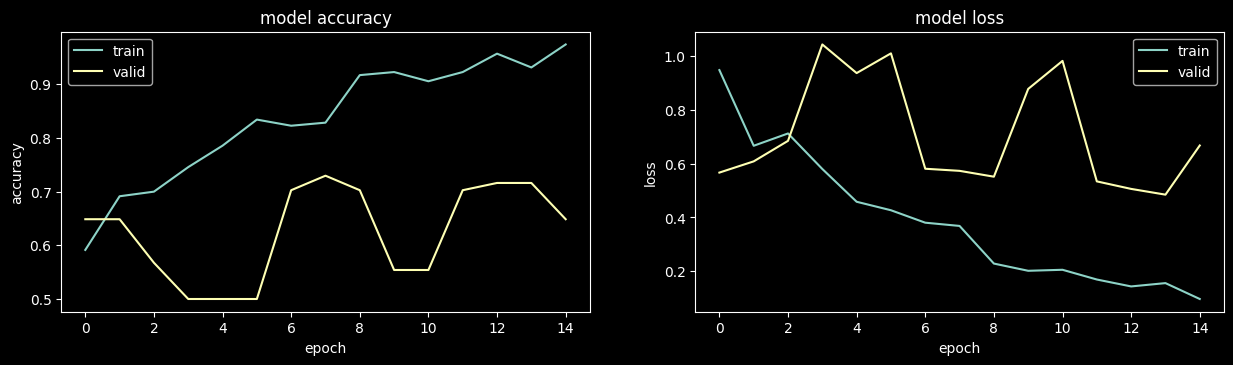

In [ ]:
plt.figure(1, figsize = (15,8))

plt.subplot(221)
plt.plot(history_base_model.history['accuracy'])
plt.plot(history_base_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.subplot(222)
plt.plot(history_base_model.history['loss'])
plt.plot(history_base_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.show()

In [ ]:
metrics = baseline_model.evaluate(test_generator, verbose = 1)
print(f" accuracy of baseline CNN model = {round(metrics[1],2)}")

3/3 [==============================] - 1s 157ms/step - loss: 0.7560 - accuracy: 0.5526
 accuracy of baseline CNN model = 0.55


## VGG16 model

In [ ]:
basemodel_vgg16 = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224, 3), classes=2)
basemodel_vgg16.trainable = False
model_vgg16 = tf.keras.Sequential([
    basemodel_vgg16,
    tf.keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(2, activation='softmax')
])

model_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                      

In [ ]:
model_vgg16.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')
history_vgg16 = model_vgg16.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator,
)

Epoch 1/15
11/11 [==============================] - 4s 187ms/step - loss: 0.6072 - accuracy: 0.7229 - val_loss: 0.4337 - val_accuracy: 0.8378
Epoch 2/15
11/11 [==============================] - 2s 159ms/step - loss: 0.4831 - accuracy: 0.7400 - val_loss: 0.4452 - val_accuracy: 0.8378
Epoch 3/15
11/11 [==============================] - 2s 189ms/step - loss: 0.4353 - accuracy: 0.8029 - val_loss: 0.5890 - val_accuracy: 0.6892
Epoch 4/15
11/11 [==============================] - 2s 162ms/step - loss: 0.4297 - accuracy: 0.8057 - val_loss: 0.4371 - val_accuracy: 0.7568
Epoch 5/15
11/11 [==============================] - 2s 156ms/step - loss: 0.3758 - accuracy: 0.8429 - val_loss: 0.8279 - val_accuracy: 0.6351
Epoch 6/15
11/11 [==============================] - 2s 160ms/step - loss: 0.4470 - accuracy: 0.7971 - val_loss: 0.3917 - val_accuracy: 0.7973
Epoch 7/15
11/11 [==============================] - 2s 159ms/step - loss: 0.3533 - accuracy: 0.8514 - val_loss: 0.5181 - val_accuracy: 0.7297
Epoch 

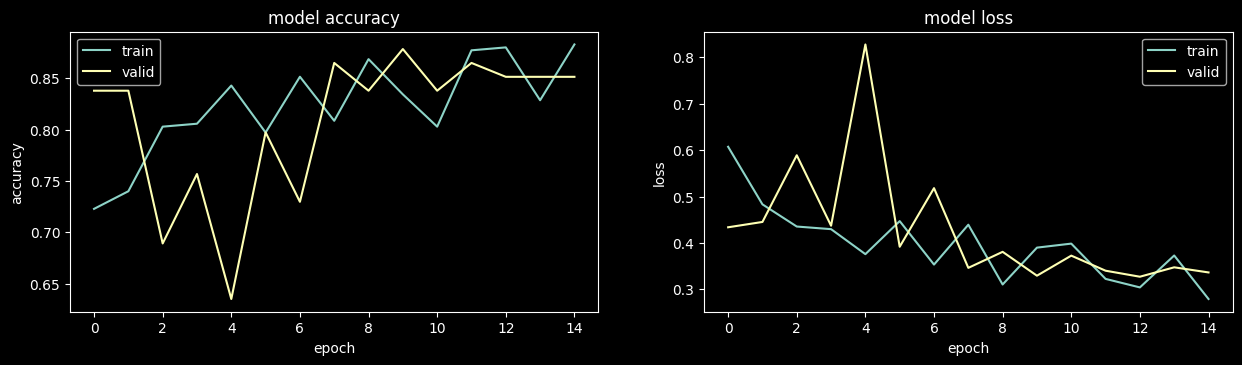

In [ ]:
plt.figure(1, figsize = (15,8))

plt.subplot(221)
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.subplot(222)
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.show()

In [ ]:
metrics = model_vgg16.evaluate(test_generator, verbose = 1)
print(f"VGG16 model accuracy is {round(metrics[1],2)}")

3/3 [==============================] - 0s 107ms/step - loss: 0.4581 - accuracy: 0.8158
VGG16 model accuracy is 0.82


In [ ]:
# Save the model
model_vgg16.save('vgg16_model.h5')

## VGG 19

In [ ]:
basemodel_vgg19 = tf.keras.applications.vgg19.VGG19(include_top=False, weights="imagenet", input_shape=(224,224, 3), classes=2)
basemodel_vgg19.trainable = False
model_vgg19 = tf.keras.Sequential([
    basemodel_vgg19,
    tf.keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(2, activation='softmax')
])

model_vgg19.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 32)                

In [ ]:
model_vgg19.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')
history_vgg19 = model_vgg19.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator,
)

Epoch 1/15
11/11 [==============================] - 6s 262ms/step - loss: 0.5480 - accuracy: 0.7571 - val_loss: 1.1672 - val_accuracy: 0.5135
Epoch 2/15
11/11 [==============================] - 2s 186ms/step - loss: 0.5039 - accuracy: 0.7971 - val_loss: 0.6766 - val_accuracy: 0.6351
Epoch 3/15
11/11 [==============================] - 2s 187ms/step - loss: 0.4722 - accuracy: 0.7686 - val_loss: 0.3777 - val_accuracy: 0.8784
Epoch 4/15
11/11 [==============================] - 2s 189ms/step - loss: 0.4385 - accuracy: 0.8143 - val_loss: 0.3547 - val_accuracy: 0.8514
Epoch 5/15
11/11 [==============================] - 2s 189ms/step - loss: 0.4170 - accuracy: 0.8000 - val_loss: 0.3680 - val_accuracy: 0.8243
Epoch 6/15
11/11 [==============================] - 2s 212ms/step - loss: 0.4683 - accuracy: 0.8114 - val_loss: 0.3861 - val_accuracy: 0.8514
Epoch 7/15
11/11 [==============================] - 2s 213ms/step - loss: 0.3860 - accuracy: 0.8343 - val_loss: 0.3502 - val_accuracy: 0.8514
Epoch 

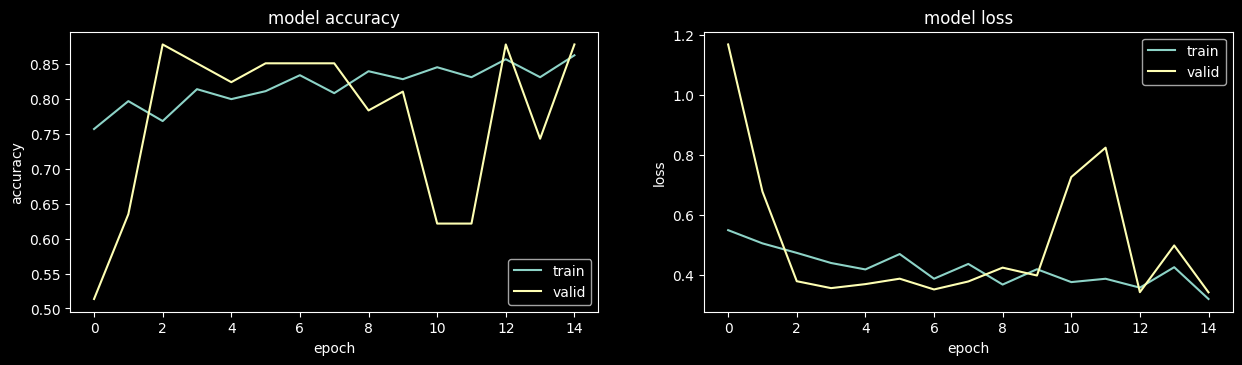

In [ ]:
plt.figure(1, figsize = (15,8))

plt.subplot(221)
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.subplot(222)
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.show()

In [ ]:
metrics = model_vgg19.evaluate(test_generator, verbose = 1)
print(f"VGG19 model accuracy is {round(metrics[1],2)}")

3/3 [==============================] - 1s 112ms/step - loss: 0.3250 - accuracy: 0.8684
VGG19 model accuracy is 0.87


In [ ]:
model_vgg19.save('vvg19_model.h5')

## ResNet-50

In [ ]:
basemodel_resnet50 = tf.keras.applications.resnet_v2.ResNet50V2(include_top=False, weights="imagenet", input_shape=(224,224, 3), classes=2)
basemodel_resnet50.trainable = False
model_resnet50 = tf.keras.Sequential([
    basemodel_resnet50,
    tf.keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(2, activation='softmax')
])

model_resnet50.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_23 (Dense)            (None, 256)               524544    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                

In [ ]:
model_resnet50.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')
history_resnet50 = model_resnet50.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator,
)

Epoch 1/15
11/11 [==============================] - 10s 402ms/step - loss: 0.8278 - accuracy: 0.5714 - val_loss: 0.6846 - val_accuracy: 0.5541
Epoch 2/15
11/11 [==============================] - 2s 159ms/step - loss: 0.6017 - accuracy: 0.6943 - val_loss: 0.5126 - val_accuracy: 0.7297
Epoch 3/15
11/11 [==============================] - 2s 166ms/step - loss: 0.5552 - accuracy: 0.7714 - val_loss: 0.4155 - val_accuracy: 0.7568
Epoch 4/15
11/11 [==============================] - 2s 165ms/step - loss: 0.3473 - accuracy: 0.8514 - val_loss: 0.3104 - val_accuracy: 0.8649
Epoch 5/15
11/11 [==============================] - 1s 122ms/step - loss: 0.3430 - accuracy: 0.8629 - val_loss: 0.3190 - val_accuracy: 0.8649
Epoch 6/15
11/11 [==============================] - 1s 132ms/step - loss: 0.2498 - accuracy: 0.8829 - val_loss: 0.4363 - val_accuracy: 0.8108
Epoch 7/15
11/11 [==============================] - 2s 133ms/step - loss: 0.2259 - accuracy: 0.9114 - val_loss: 0.2768 - val_accuracy: 0.8919
Epoch

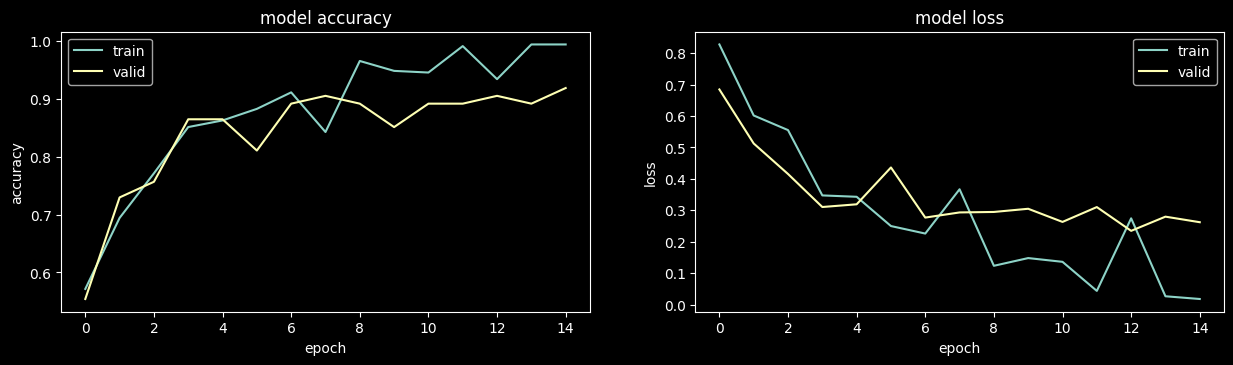

In [ ]:
plt.figure(1, figsize = (15,8))

plt.subplot(221)
plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.subplot(222)
plt.plot(history_resnet50.history['loss'])
plt.plot(history_resnet50.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])

plt.show()

In [ ]:
metrics = model_resnet50.evaluate(test_generator, verbose = 1)
print(f"VGG19 model accuracy is {round(metrics[1],2)}")

3/3 [==============================] - 1s 466ms/step - loss: 0.3431 - accuracy: 0.8684
VGG19 model accuracy is 0.87


In [ ]:
model_resnet50.save('resnet_model.h5')